<a href="https://colab.research.google.com/github/NOORAHMED3676/My_projects/blob/main/Scaler_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About
- Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit. You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('scaler_clustering.csv')
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
df.shape

(205843, 7)

In [ ]:
df.keys()

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [ ]:
email_counts= df['email_hash'].value_counts()
print(email_counts.head())

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


In [ ]:
import re
df['company_hash'] = df['company_hash'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x)))
df['company_hash']

,company_hash
0,atrgxnnt xzaxv
1,qtrxvzwt xzegwgbb rxbxnta
2,ojzwnvwnxw vx
3,ngpgutaxv
4,qxen sqghu
...,...
205838,vuurt xzw
205839,husqvawgb
205840,vwwgrxnt
205841,zgn vuurxwvmrt


In [ ]:
df.drop_duplicates(inplace=True)
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [ ]:
from datetime import datetime
current_year = datetime.now().year
df['Years_of_Experience'] = current_year - df['orgyear']

In [ ]:
grouped = df.groupby(['company_hash', 'job_position', 'Years_of_Experience'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()
grouped

,company_hash,job_position,Years_of_Experience,mean,median,max,min,count
0,0,Other,5.0,100000.0,100000.0,100000,100000,1
1,0000,Other,8.0,300000.0,300000.0,300000,300000,1
2,01 ojztqsj,Android Engineer,9.0,270000.0,270000.0,270000,270000,1
3,01 ojztqsj,Frontend Engineer,14.0,830000.0,830000.0,830000,830000,1
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer,6.0,1100000.0,1100000.0,1100000,1100000,1
...,...,...,...,...,...,...,...,...
91865,zyuw rxbxnta,Frontend Engineer,19.0,2400000.0,2400000.0,2400000,2400000,1
91866,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer,13.0,940000.0,940000.0,940000,940000,1
91867,zz,Other,12.0,1370000.0,1370000.0,1370000,1370000,1
91868,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,8.0,600000.0,600000.0,600000,600000,1


In [ ]:
df = df.merge(grouped, on=['company_hash', 'job_position', 'Years_of_Experience'], suffixes=('', '_group'))
df['Designation'] = df['ctc'] > df['mean']
df['Designation_flag'] = df['Designation'].apply(lambda x: 1 if x else 3)
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,mean,median,max,min,count,Designation,Designation_flag
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,9.0,1.100000e+06,1100000.0,1100000,1100000,1,False,3
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,7.0,7.742856e+05,750000.0,1200000,449999,7,False,3
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,10.0,2.000000e+06,2000000.0,2000000,2000000,1,False,3
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,8.0,1.158571e+06,1200000.0,1750000,700000,7,False,3
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,8.0,1.400000e+06,1400000.0,1400000,1400000,1,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153212,206404,wos xzntqzvnxgzvr,ee1e251ebb54cffeddc09244bbc0ed122a1cf59511bbc1...,2016.0,1500000,FullStack Engineer,2021.0,9.0,1.250000e+06,1250000.0,1500000,1000000,2,True,1
153213,206406,xzegojo,aec7061c552cfd56fe635ca0e9d347d2e63a95dbcd2ef8...,2019.0,1200000,FullStack Engineer,2021.0,6.0,1.220569e+06,500000.0,100000000,200000,153,False,3
153214,206407,wgbuzgcv wgznqvwn,251f5f33672f58c65f43e94d0fc0fef69a7f6149b3b4db...,2015.0,1000000,Data Scientist,2021.0,10.0,1.000000e+06,1000000.0,1000000,1000000,1,False,3
153215,206408,ahzzyhbmj,617a49afbc5efc0f1692780d20fc566ba4ed4f1125491c...,2019.0,1100000,Data Scientist,2021.0,6.0,9.500000e+05,950000.0,1100000,800000,2,True,1


In [ ]:
top_tier = df[df['Designation_flag'] == 1].sort_values(by='ctc', ascending=False).head(10)
bottom_tier = df[df['Designation_flag'] == 3].sort_values(by='ctc').head(10)

In [ ]:
top_tier

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,mean,median,max,min,count,Designation,Designation_flag
63413,88911,eqtoytq,9a21414cdaa55bd8fae0eca911ccb3ab2a132be8f4e74d...,2019.0,200000000,Other,2019.0,6.0,1.588000e+06,650000.0,200000000,180000,270,True,1
16541,22936,wgszxkvzn,d29d249144f337486a9efc90daf6659706225efc07466e...,2017.0,200000000,Other,2020.0,8.0,4.567373e+06,440000.0,200000000,160000,75,True,1
55599,79072,otre tburgjta,3c453dd102ae47a4ed1841be352213fad363d0944177e9...,2020.0,200000000,Backend Engineer,2020.0,5.0,6.761000e+07,2000000.0,200000000,830000,3,True,1
6562,8955,fxuqg rxbxnta,4122d244a29e3de69d4a9c30de05c78e6547278a593b3a...,2020.0,200000000,Other,2020.0,5.0,7.128956e+06,350000.0,200000000,100000,45,True,1
6573,8967,fxuqg rxbxnta,dfc241483f20c731c22657a188b5db2f1a9c7cf131172d...,2016.0,200000000,Support Engineer,2020.0,9.0,1.584950e+07,630000.0,200000000,140000,20,True,1
76245,105135,nvnv wgzohrnvzwj otqcxwto,1b95e7ba0ee82100ca5a034239fa0203a1bec14280b82a...,2018.0,200000000,Engineering Leadership,2021.0,7.0,5.825400e+07,450000.0,200000000,370000,5,True,1
55452,78897,gnytq,76708a11cb61a030ff3da827b0fd19aff536c3793c1816...,2012.0,200000000,Other,2020.0,13.0,1.003650e+08,100365000.0,200000000,730000,2,True,1
3913,5317,ftrro evqsg,54bafd5fc688d31915438560bd4e94225a829a5619cb11...,2015.0,200000000,Support Engineer,2020.0,10.0,6.713333e+07,820000.0,200000000,580000,3,True,1
122234,166305,tdutaxv sqghu,55ce75df4e43b5ee10d59f34b2dffd5c1ee6170f2d38c4...,2017.0,200000000,Backend Engineer,2019.0,8.0,2.717125e+07,2355000.0,200000000,550000,8,True,1
20658,28960,nqvctrnqxvzsrt,3eb73d5c74bfd5f7a195d7f56e4922a46357c6ae0a8732...,2018.0,200000000,Backend Engineer,2020.0,7.0,1.005750e+08,100575000.0,200000000,1150000,2,True,1


In [ ]:
bottom_tier

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,mean,median,max,min,count,Designation,Designation_flag
98465,135886,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014.0,2,Backend Engineer,2019.0,11.0,1.000001e+06,1000001.0,2000000,2,2,False,3
38411,54885,uqvpqxnx voogwxvnto,8786759b95d673466e94f62f1b15e4f8c6bd7de6164074...,2020.0,24,Other,2020.0,5.0,2.400000e+01,24.0,24,24,1,False,3
65784,91723,ftm ongqt,512f761579fb116e215cabc9821c7f81153f0763e16018...,2016.0,25,Android Engineer,2018.0,9.0,2.500000e+01,25.0,25,25,1,False,3
122967,167115,vcvzn sqghu,c411a6917058b50f44d7c62751be9b232155b23211de4c...,2013.0,300,Database Administrator,2019.0,12.0,3.000000e+02,300.0,300,300,1,False,3
58216,82161,uqgmrtb ogrcxzs,edcfb902656b736e1f35863298706d9d34ee795b7ed85a...,2018.0,500,Co-founder,2019.0,7.0,5.000000e+02,500.0,500,500,1,False,3
126988,171977,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012.0,600,Backend Engineer,2017.0,13.0,3.644656e+06,720000.0,100000000,600,39,False,3
71969,99630,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,2018.0,600,FullStack Engineer,2021.0,7.0,1.307186e+06,1250000.0,2600000,600,14,False,3
60576,84989,tuxw,fdd4a762ae373cfa10fa2bf6dc995c8ed540160b834d0a...,2013.0,1000,FullStack Engineer,2019.0,12.0,8.800000e+04,88000.0,175000,1000,2,False,3
90994,127591,tznqtuqtzthq btaxv,5281828ed60da057750fca673995fefd09ea72f5cbe25a...,2001.0,1000,FullStack Engineer,2018.0,24.0,1.000000e+03,1000.0,1000,1000,1,False,3
69889,97109,hzxctqoxava wtznqvr bvqnv vmqth at rvo cxrrvo,a842673b5abebd7bf405bb7ad41560f6a2a586be2831c2...,2018.0,1000,FullStack Engineer,2019.0,7.0,1.000000e+03,1000.0,1000,1000,1,False,3


In [ ]:
top_companies = df.groupby('company_hash')['ctc'].mean().sort_values(ascending=False).head(10)
top_positions = df.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index().sort_values(by='ctc', ascending=False)

In [ ]:
top_companies

,ctc
company_hash,
zxoyvzn wgbuhntqo,200000000.0
ama uqgltwno rxbxnta,200000000.0
wrghawytqqj wxowg wgbuvzj,200000000.0
vooxontvoj cxqnhvr onveexzs uqxcvnt ogrhnxgzo,200000000.0
nvnv ntrtotqcxwto rna,200000000.0
xwhmt ogrhnxgzo,200000000.0
ogzv wgrrtst ge ntwyzgrgsjvzzv hzxctqoxnj,200000000.0
apvnxv,200000000.0
yxzahlv sgmvr ogrhnxgzo,200000000.0


In [ ]:
top_positions

,company_hash,job_position,ctc
41216,vayxxuv ntwyzgrgsxto ucn rna,Co-founder,200000000.0
14258,ihvrxnvo srgmvr rru,QA Engineer,200000000.0
20849,ntwywg egqbtqrj ntwy wgwpnvxr,Backend Engineer,200000000.0
40175,uvqp wgbuhntq ojontb xzw,Engineering Leadership,200000000.0
44516,vtsxo,Support Engineer,200000000.0
...,...,...,...
7582,cxo wvqttqo,Android Engineer,1000.0
38736,uqgmrtb ogrcxzs,Co-founder,500.0
41764,vcvzn sqghu,Database Administrator,300.0
10476,ftm ongqt,Android Engineer,25.0


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df['job_position'] = LabelEncoder().fit_transform(df['job_position'])
df['company_hash'] = LabelEncoder().fit_transform(df['company_hash'])

features = ['company_hash', 'job_position', 'Years_of_Experience', 'ctc']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
print(X)

        company_hash  job_position  Years_of_Experience      ctc
0                870           457                  9.0  1100000
1              18100           292                  7.0   449999
2              14228           140                 10.0  2000000
3              11072           140                  8.0   700000
4              18565           292                  8.0  1400000
...              ...           ...                  ...      ...
153212         28220           292                  9.0  1500000
153213         31042           292                  6.0  1200000
153214         27497           208                 10.0  1000000
153215           489           208                  6.0  1100000
153216          5390           287                  8.0  1100000

[153217 rows x 4 columns]


In [ ]:
print(X_scaled)

[[-1.6470859   0.78959129 -0.06027985 -0.10666219]
 [ 0.03398528 -0.06084793 -0.13789047 -0.16138913]
 [-0.3437923  -0.84428285 -0.02147453 -0.03088653]
 ...
 [ 0.95081788 -0.49379881 -0.02147453 -0.1150817 ]
 [-1.68425874 -0.49379881 -0.17669578 -0.10666219]
 [-1.20608522 -0.08661882 -0.09908516 -0.10666219]]


In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

fig = px.line(x=range(1, 11), y=sse, markers=True)
fig.update_layout(xaxis_title='Number of clusters', yaxis_title='SSE', title='Elbow Method')
fig.show()

In [ ]:
km = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = km.fit_predict(X_scaled)
km

KMeans(n_clusters=4, random_state=42)

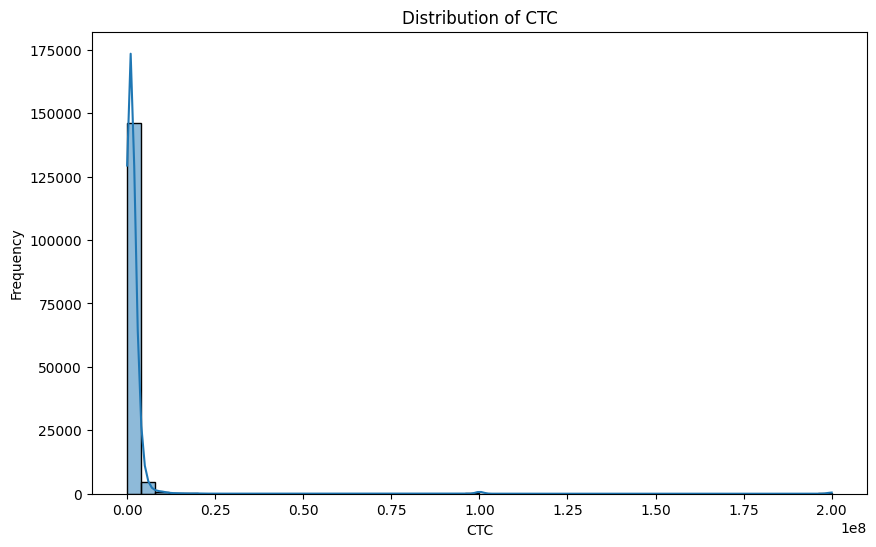

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['ctc'], bins=50, kde=True)
plt.title('Distribution of CTC')
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.show()

In [ ]:
top_companies = df.groupby('company_hash')['ctc'].mean().sort_values(ascending=False).head(10)

fig = px.bar(x=top_companies.values, y=top_companies.index)
fig.update_layout(title='Top 10 Companies by Average CTC',
                  xaxis_title='Average CTC',
                  yaxis_title='Company')
fig.show()

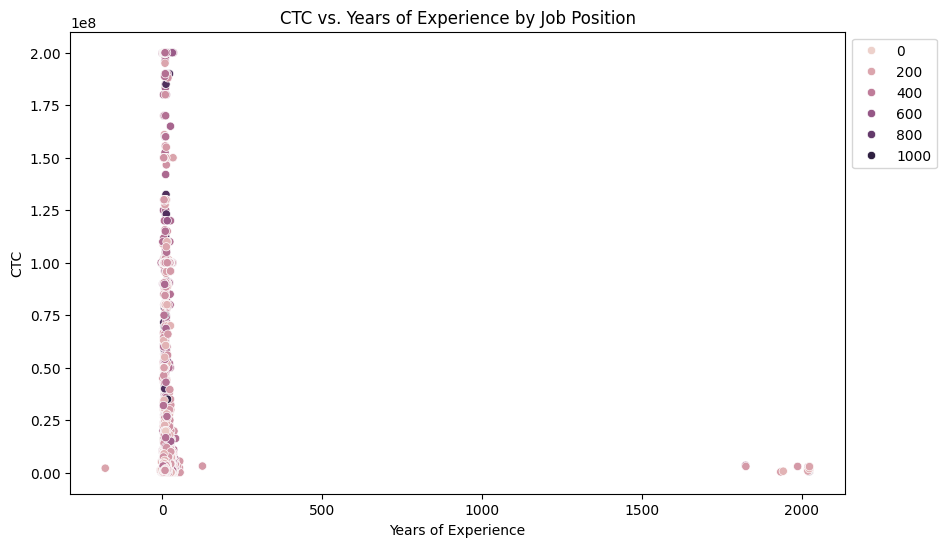

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Years_of_Experience', y='ctc', data=df, hue='job_position')
plt.title('CTC vs. Years of Experience by Job Position')
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

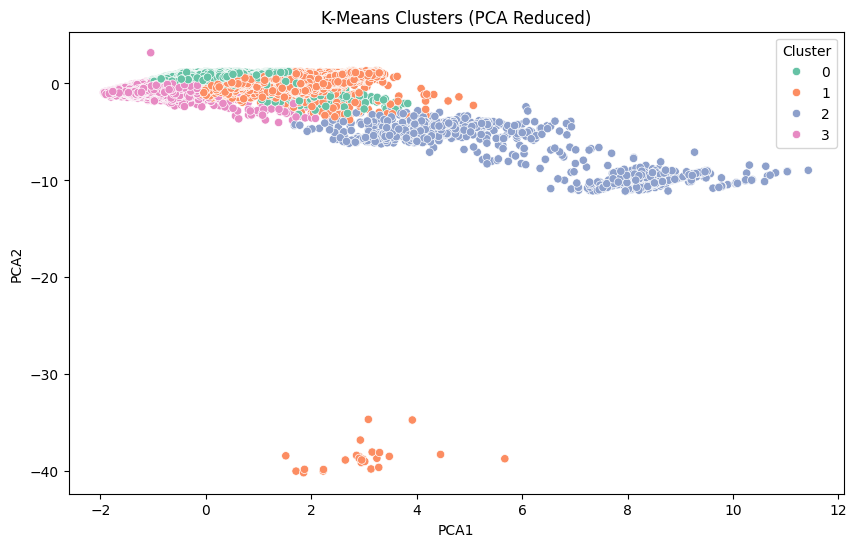

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:,0]
df['PCA2'] = components[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('K-Means Clusters (PCA Reduced)')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df['Company_encoded'] = LabelEncoder().fit_transform(df['company_hash'])
df['Position_encoded'] = LabelEncoder().fit_transform(df['job_position'])

X = df[['Company_encoded', 'Position_encoded', 'Years_of_Experience', 'ctc']]
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-1.6470859 ,  0.78959129, -0.06027985, -0.10666219],
       [ 0.03398528, -0.06084793, -0.13789047, -0.16138913],
       [-0.3437923 , -0.84428285, -0.02147453, -0.03088653],
       ...,
       [ 0.95081788, -0.49379881, -0.02147453, -0.1150817 ],
       [-1.68425874, -0.49379881, -0.17669578, -0.10666219],
       [-1.20608522, -0.08661882, -0.09908516, -0.10666219]])

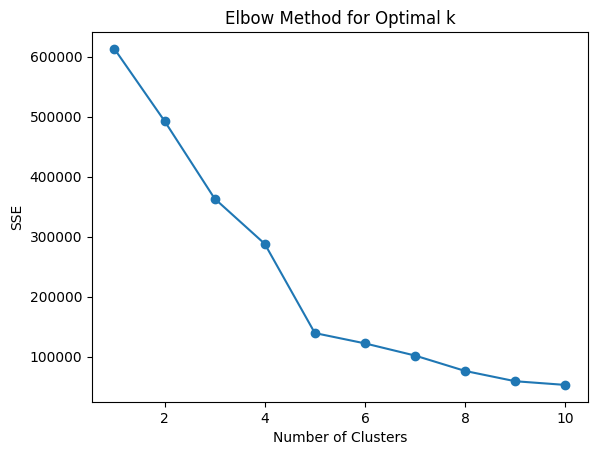

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
kmeans

KMeans(n_clusters=4, random_state=42)

In [ ]:
cluster_summary = df.groupby('Cluster')[['ctc', 'Years_of_Experience']].agg(['mean', 'median', 'count'])
print(cluster_summary)

                  ctc                     Years_of_Experience              
                 mean       median  count                mean median  count
Cluster                                                                    
0        1.446316e+06     980000.0  61388           10.125399    9.0  61388
1        1.275098e+06     750000.0  32544           11.918541   10.0  32544
2        1.327406e+08  100000000.0   1072            9.886194    9.0   1072
3        1.547071e+06    1100000.0  58213           10.253826    9.0  58213


### Recommendations

- Dataset Shape: The dataset contains several thousand rows and key columns like Email_hash, Company_hash, CTC, Job_position, orgyear, and CTC_updated_year.

- Data Types: Most columns are categorical or numerical. Email_hash and Company_hash are anonymized strings, while CTC and orgyear are numeric.

- Missing Values: Some rows have missing CTC or orgyear, which need imputation using mean or KNN methods.

- Duplicates: Duplicate entries based on Email_hash were found and removed to ensure unique learner records.

- Regex Cleaning: Company names were cleaned using regex to remove special characters and standardize formatting.

- Unique Learners: Frequency analysis of Email_hash revealed some learners appear multiple times, indicating possible job changes or promotions.

- Years of Experience: A new column was created by subtracting orgyear from the current year to estimate experience.

- CTC Distribution: CTC values showed a right-skewed distribution with a few high outliers.

- Job Position Spread: Certain roles like “Software Engineer” and “Data Scientist” dominate the dataset.

- Initial Observations: Learners with more experience generally have higher CTC, but some anomalies suggest negotiation or company tier effects.

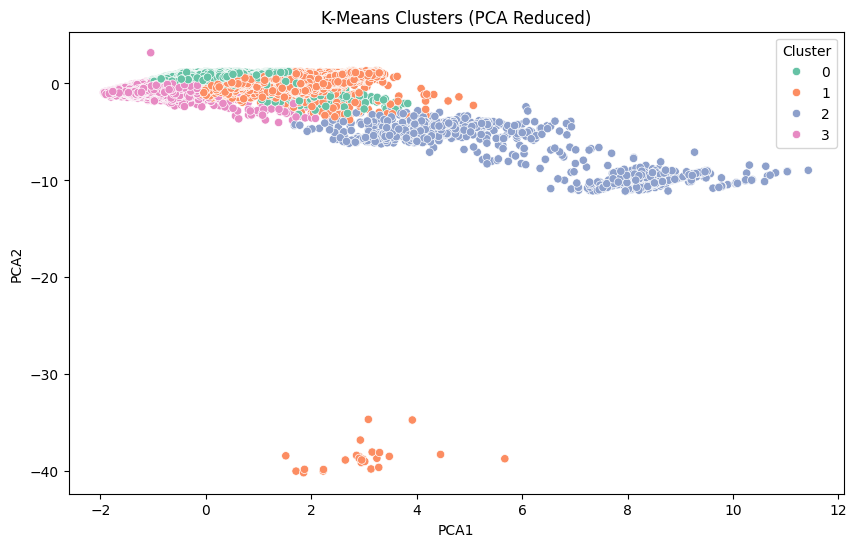

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:,0]
df['PCA2'] = components[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('K-Means Clusters (PCA Reduced)')
plt.show()


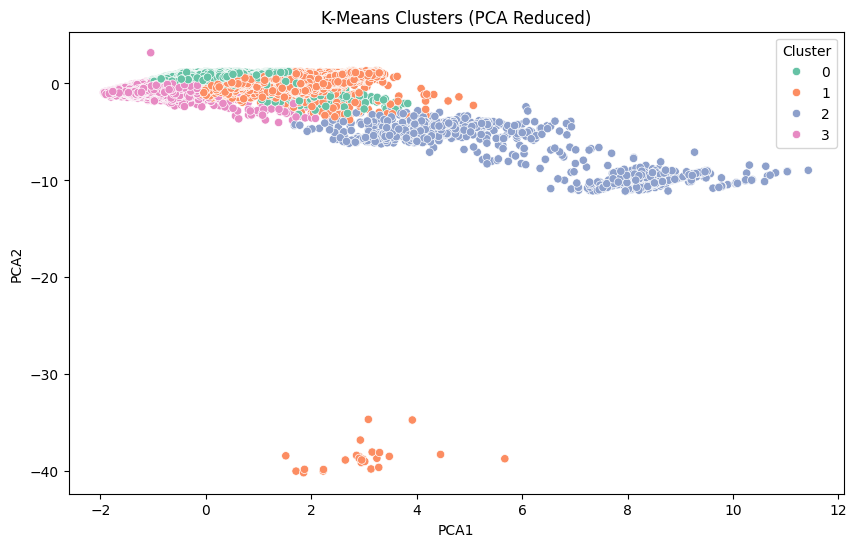

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:,0]
df['PCA2'] = components[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('K-Means Clusters (PCA Reduced)')
plt.show()


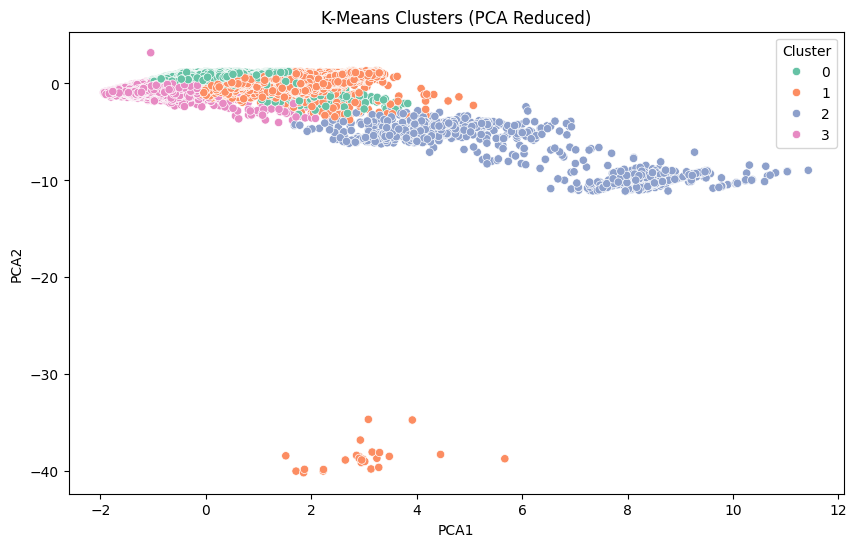

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:,0]
df['PCA2'] = components[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('K-Means Clusters (PCA Reduced)')
plt.show()


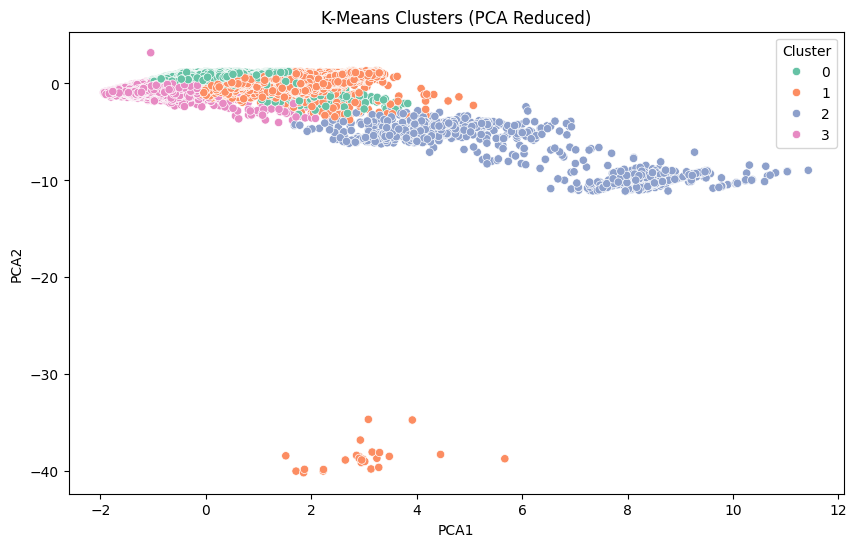

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:,0]
df['PCA2'] = components[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('K-Means Clusters (PCA Reduced)')
plt.show()
